# Problem statement: The goal is to understand the relationship between house features and how these variables affect the house price.


In [1]:
#Basic and most important libraries
import pandas as pd , numpy as np
from sklearn.preprocessing import StandardScaler , MinMaxScaler
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
import plotly

#Data processing functions
from sklearn.model_selection import train_test_split

#Regressor
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import RandomizedSearchCV

In [2]:
df=pd.read_excel("DS - Assignment Part 1 data set.xlsx",index_col=None)

In [3]:
df.head(5)

,Transaction date,House Age,Distance from nearest Metro station (km),Number of convenience stores,latitude,longitude,Number of bedrooms,House size (sqft),House price of unit area
0,2012.916667,32.0,84.87882,10,24.98298,121.54024,1,575,37.9
1,2012.916667,19.5,306.59470,9,24.98034,121.53951,2,1240,42.2
2,2013.583333,13.3,561.98450,5,24.98746,121.54391,3,1060,47.3
3,2013.500000,13.3,561.98450,5,24.98746,121.54391,2,875,54.8
4,2012.833333,5.0,390.56840,5,24.97937,121.54245,1,491,43.1


In [4]:
df['house_price']=df['House size (sqft)']*df['House price of unit area']

In [5]:
df.shape

(414, 10)

In [6]:
df.nunique()

Transaction date                             12
House Age                                   236
Distance from nearest Metro station (km)    259
Number of convenience stores                 11
latitude                                    234
longitude                                   232
Number of bedrooms                            3
House size (sqft)                           328
House price of unit area                    270
house_price                                 414
dtype: int64

In [7]:
df.tail(5)

,Transaction date,House Age,Distance from nearest Metro station (km),Number of convenience stores,latitude,longitude,Number of bedrooms,House size (sqft),House price of unit area,house_price
409,2013.000000,13.7,4082.01500,0,24.94155,121.50381,3,803,15.4,12366.2
410,2012.666667,5.6,90.45606,9,24.97433,121.54310,2,1278,50.0,63900.0
411,2013.250000,18.8,390.96960,7,24.97923,121.53986,1,503,40.6,20421.8
412,2013.000000,8.1,104.81010,5,24.96674,121.54067,1,597,52.5,31342.5
413,2013.500000,6.5,90.45606,9,24.97433,121.54310,2,1097,63.9,70098.3


In [8]:
df.sample(5)

,Transaction date,House Age,Distance from nearest Metro station (km),Number of convenience stores,latitude,longitude,Number of bedrooms,House size (sqft),House price of unit area,house_price
13,2012.666667,20.4,2469.64500,4,24.96108,121.51046,3,928,23.8,22086.4
140,2013.250000,16.2,289.32480,5,24.98203,121.54348,1,486,51.4,24980.4
192,2013.166667,43.8,57.58945,7,24.96750,121.54069,3,1000,42.7,42700.0
325,2013.083333,36.6,488.81930,8,24.97015,121.54494,2,1166,38.1,44424.6
304,2013.416667,20.0,1626.08300,3,24.96622,121.51668,3,970,29.4,28518.0


In [9]:
df.describe()

,Transaction date,House Age,Distance from nearest Metro station (km),Number of convenience stores,latitude,longitude,Number of bedrooms,House size (sqft),House price of unit area,house_price
count,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000
mean,2013.148953,17.712560,1083.885689,4.094203,24.969030,121.533361,1.987923,931.475845,37.980193,35597.804106
std,0.281995,11.392485,1262.109595,2.945562,0.012410,0.015347,0.818875,348.910269,13.606488,19890.892075
min,2012.666667,0.000000,23.382840,0.000000,24.932070,121.473530,1.000000,402.000000,7.600000,5440.400000
25%,2012.916667,9.025000,289.324800,1.000000,24.963000,121.528085,1.000000,548.000000,27.700000,20482.700000
50%,2013.166667,16.100000,492.231300,4.000000,24.971100,121.538630,2.000000,975.000000,38.450000,31224.200000
75%,2013.416667,28.150000,1454.279000,6.000000,24.977455,121.543305,3.000000,1234.750000,46.600000,48439.375000
max,2013.583333,43.800000,6488.021000,10.000000,25.014590,121.566270,3.000000,1500.000000,117.500000,161327.500000


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 414 entries, 0 to 413
Data columns (total 10 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Transaction date                          414 non-null    float64
 1   House Age                                 414 non-null    float64
 2   Distance from nearest Metro station (km)  414 non-null    float64
 3   Number of convenience stores              414 non-null    int64  
 4   latitude                                  414 non-null    float64
 5   longitude                                 414 non-null    float64
 6   Number of bedrooms                        414 non-null    int64  
 7   House size (sqft)                         414 non-null    int64  
 8   House price of unit area                  414 non-null    float64
 9   house_price                               414 non-null    float64
dtypes: float64(7), int64(3)
memory usage: 

## Data Visualization

<AxesSubplot:xlabel='House Age'>

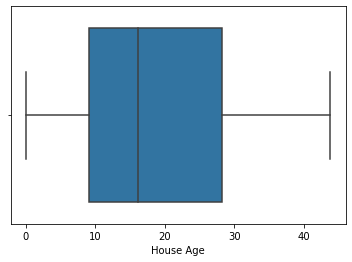

In [11]:
sns.boxplot(x="House Age", data=df)

<AxesSubplot:xlabel='Distance from nearest Metro station (km)'>

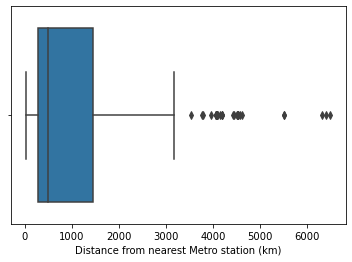

In [12]:
sns.boxplot(x="Distance from nearest Metro station (km)", data=df)

<AxesSubplot:xlabel='Number of convenience stores'>

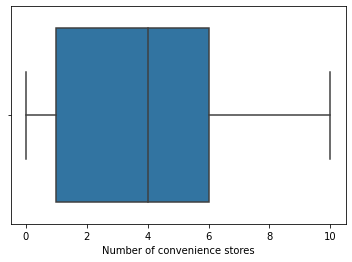

In [13]:
sns.boxplot(x="Number of convenience stores", data=df)

<AxesSubplot:xlabel='latitude'>

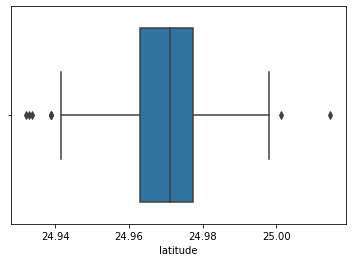

In [14]:
sns.boxplot(x="latitude", data=df)

<AxesSubplot:xlabel='longitude'>

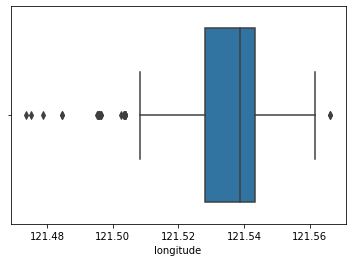

In [15]:
sns.boxplot(x="longitude", data=df)

<AxesSubplot:xlabel='Number of bedrooms'>

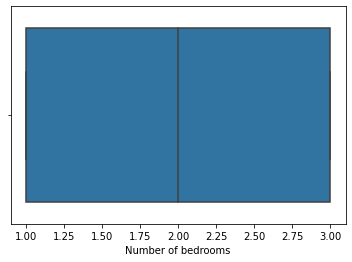

In [16]:
sns.boxplot(x="Number of bedrooms", data=df)

<AxesSubplot:xlabel='House size (sqft)'>

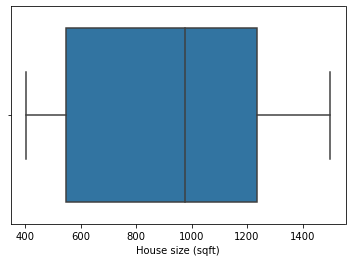

In [17]:
sns.boxplot(x="House size (sqft)", data=df)

<AxesSubplot:xlabel='Transaction date'>

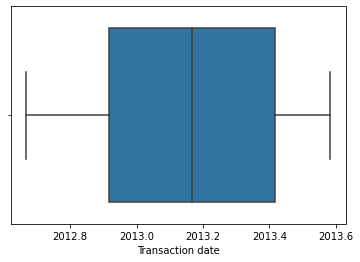

In [18]:
sns.boxplot(x="Transaction date", data=df)

<AxesSubplot:xlabel='House price of unit area'>

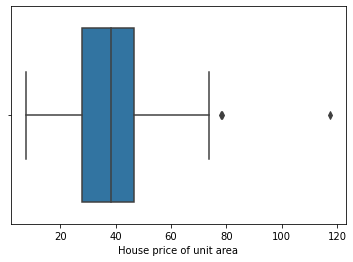

In [19]:
sns.boxplot(x="House price of unit area", data=df)

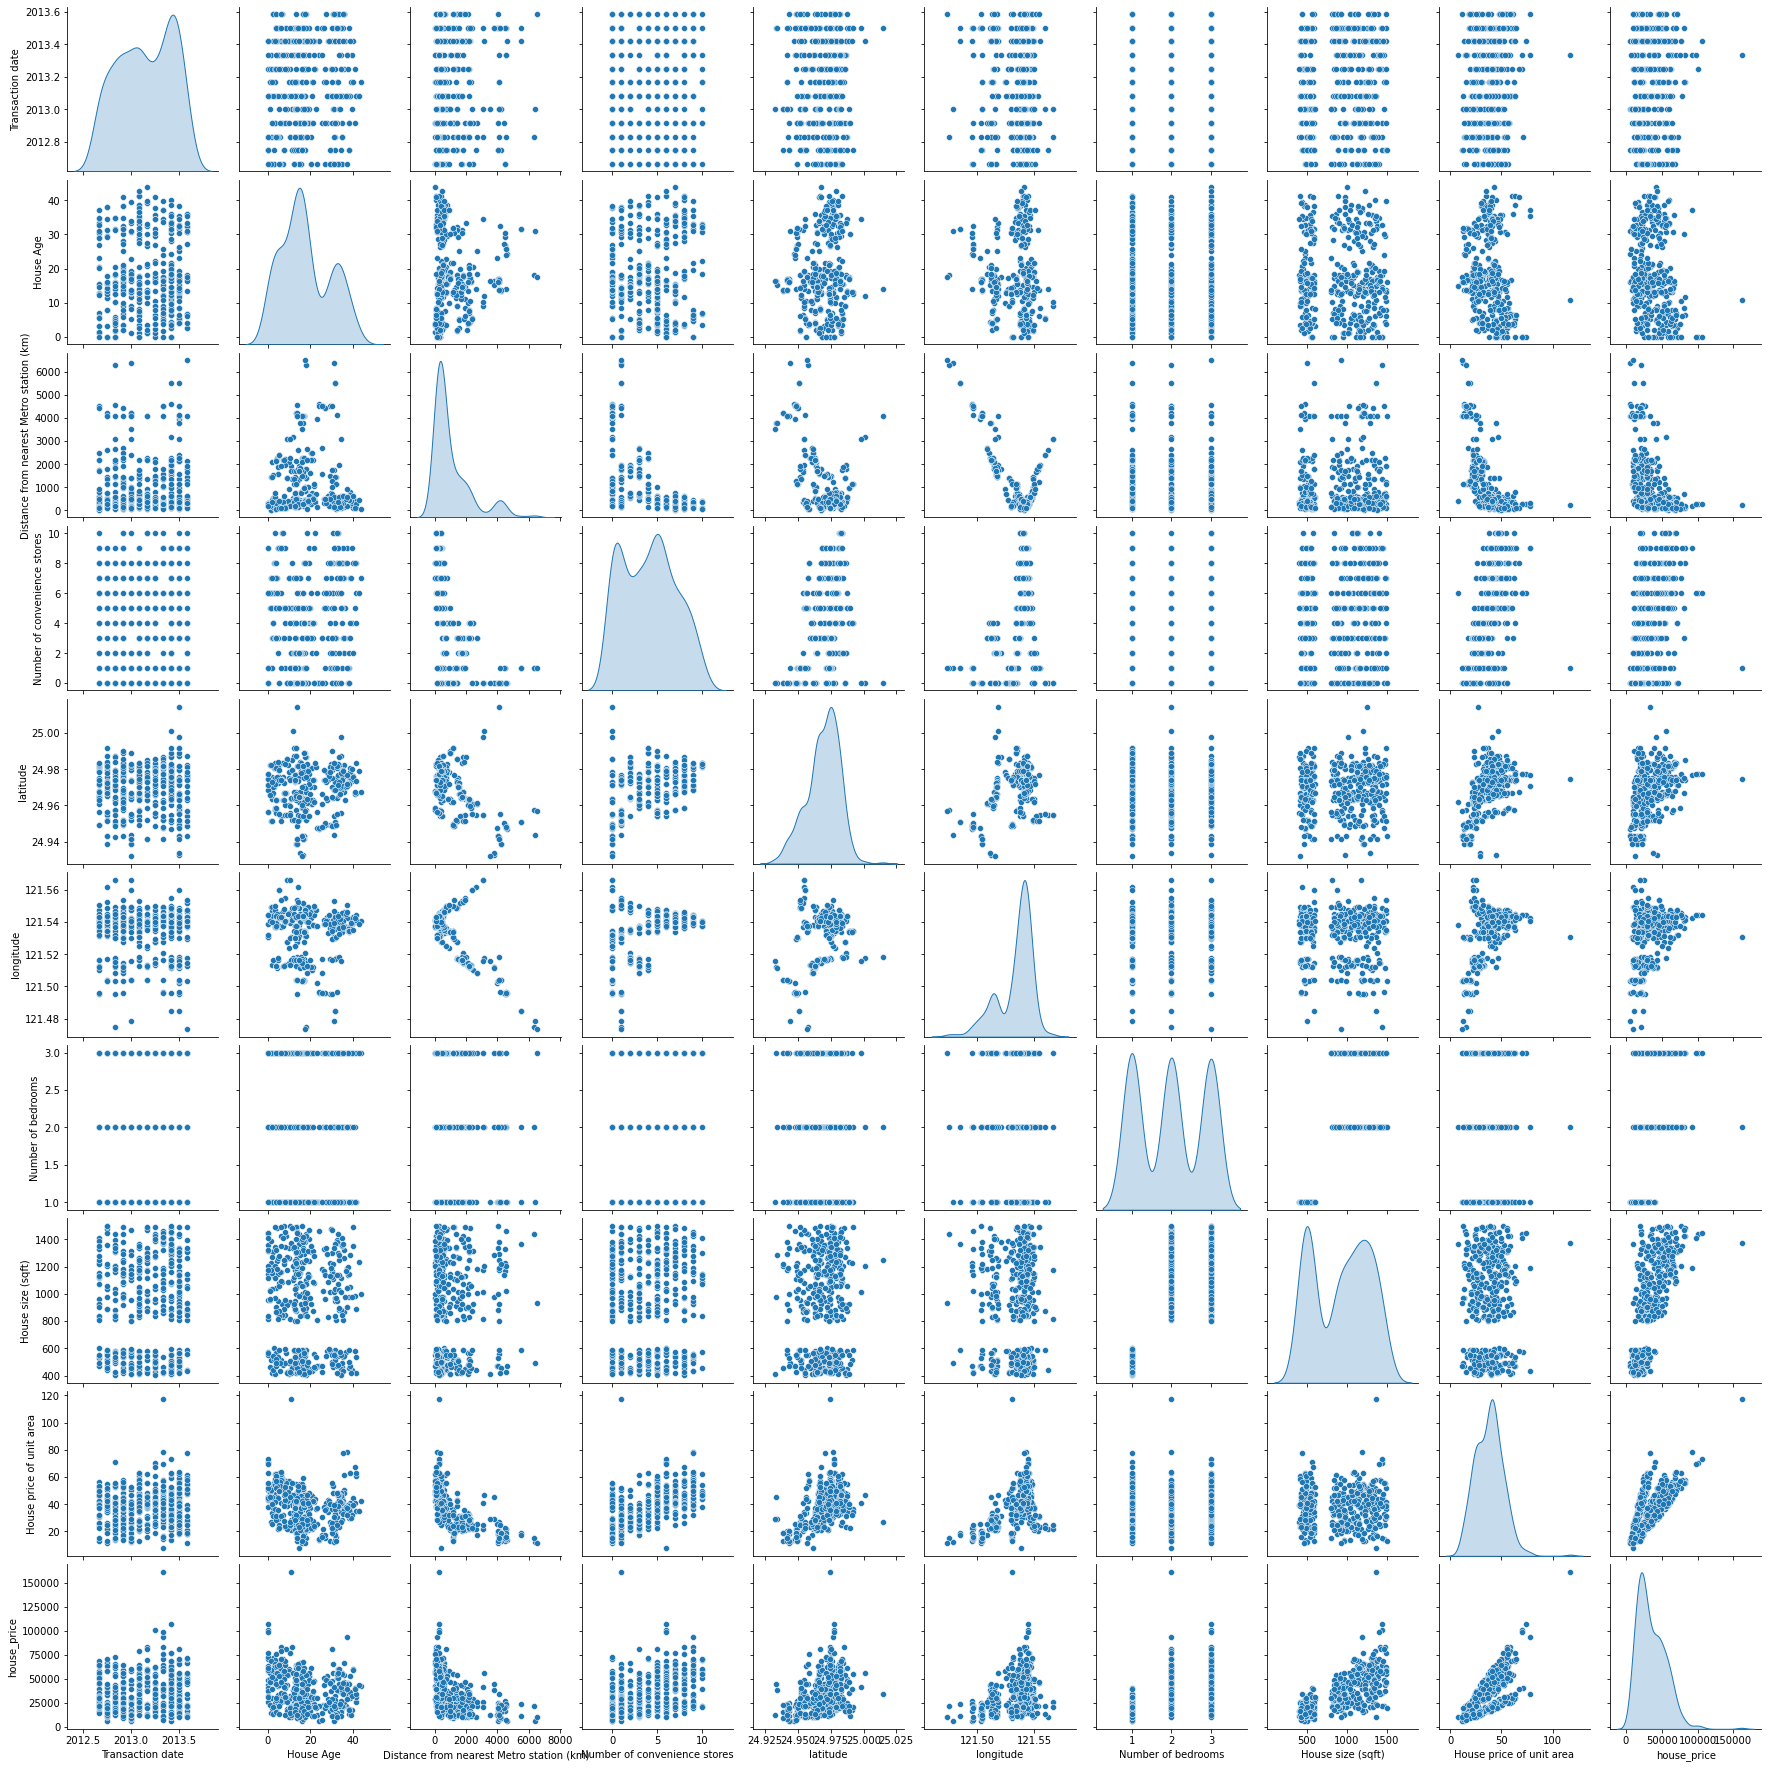

In [20]:
sns.pairplot(df,diag_kind='kde')

In [21]:
# person prefer to buy house near the metro station no matter what is the age of house in past years.
# very less number of people prefer to buy house with latitude more than 25.
# people pay less amount of house price per unit area if the age of house is nearer to 25.
# as the longitude value increases distance form metro station decreases upto certain value around 121.54 an then again increases 
# the number of convenience stores are more near to the metro station.
# people prefer less to buy home which has house price per unit area more than 70.
# there are no house of house size approx between 610 to 710.

array([[<AxesSubplot:title={'center':'Transaction date'}>,
        <AxesSubplot:title={'center':'House Age'}>,
        <AxesSubplot:title={'center':'Distance from nearest Metro station (km)'}>],
       [<AxesSubplot:title={'center':'Number of convenience stores'}>,
        <AxesSubplot:title={'center':'latitude'}>,
        <AxesSubplot:title={'center':'longitude'}>],
       [<AxesSubplot:title={'center':'Number of bedrooms'}>,
        <AxesSubplot:title={'center':'House size (sqft)'}>,
        <AxesSubplot:title={'center':'House price of unit area'}>],
       [<AxesSubplot:title={'center':'house_price'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

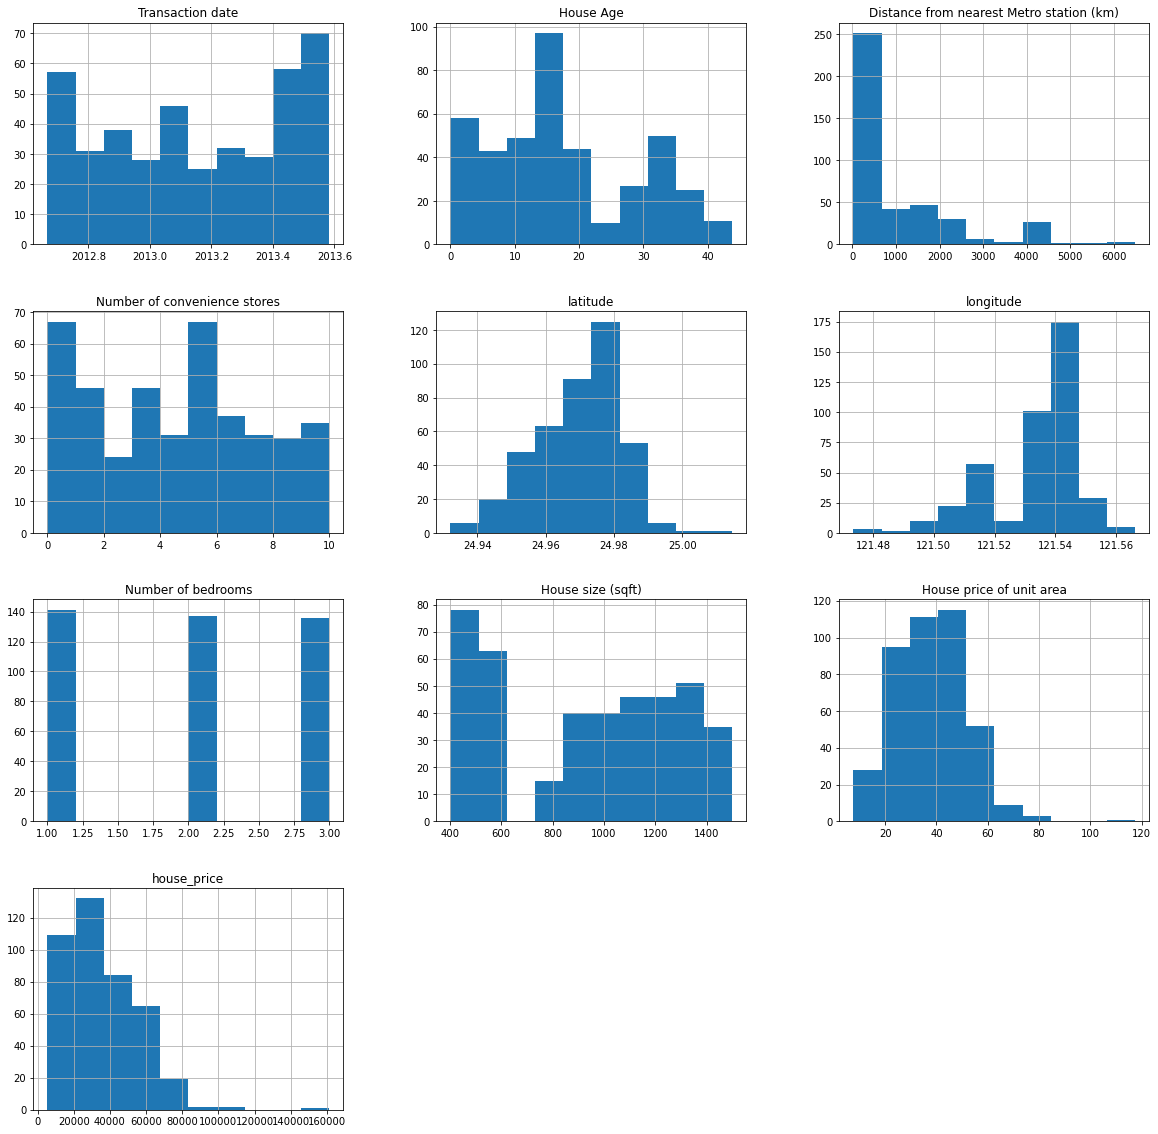

In [22]:
df.hist(figsize=(20,20))

<AxesSubplot:>

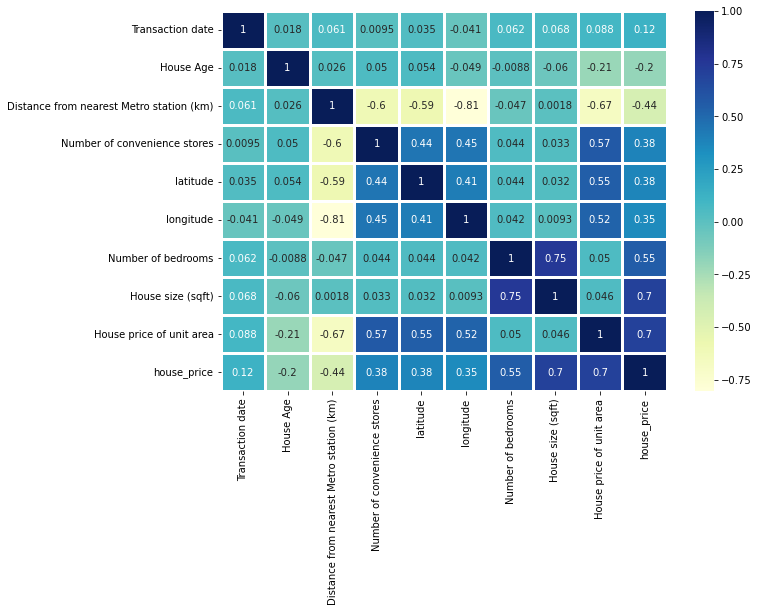

In [23]:
plt.figure(figsize=(10,7))
sns.heatmap(df.corr(),annot=True,linewidths=3,cmap="YlGnBu")

# Plots above convey following things about the dataset:

##### person prefer to buy house near the metro station no matter what is the age of house in past years.
##### very less number of people prefer to buy house with latitude more than 25.
##### people pay less amount of house price per unit area if the age of house is nearer to 25.
##### as the longitude value increases distance form metro station decreases upto certain value around 121.54 an then again increases 
##### the number of convenience stores are more near to the metro station.
##### people prefer less to buy home which has house price per unit area more than 70.
##### there are no house of house size approx between 610 to 710.
##### distance from metro station increases number of convinence store, latitude, longitude and house price of unit area decreases.
##### house price is mostly affected by number of bedrooms, latitude, longitude, no of convinence store and distance from metro station.


# Data Manipulation

### Removing outliers

In [24]:
df['Distance from nearest Metro station (km)'].quantile(q=0.75)

1454.279

In [25]:
df1=df[df['Distance from nearest Metro station (km)']>1500]
df2=df[df['Distance from nearest Metro station (km)']<=1500]

df1['Distance from nearest Metro station (km)']=1500
df3=pd.concat([df1,df2])

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_6272\51037813.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['Distance from nearest Metro station (km)']=1500


In [26]:
df1=df3[df3['latitude']<24.94]
df2=df3[df3['latitude']>=24.94]

df1['latitude']=24.94
df4=pd.concat([df1,df2])

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_6272\3850939169.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['latitude']=24.94


In [27]:
df1=df4[df4['longitude']<121.51]
df2=df4[df4['longitude']>=121.51]

df1['longitude']=121.51
df5=pd.concat([df1,df2])

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_6272\4135733084.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['longitude']=121.51


#### Normalizing data 

In [28]:
df5.columns

Index(['Transaction date', 'House Age',
       'Distance from nearest Metro station (km)',
       'Number of convenience stores', 'latitude', 'longitude',
       'Number of bedrooms', 'House size (sqft)', 'House price of unit area',
       'house_price'],
      dtype='object')

In [29]:
scaler =MinMaxScaler(feature_range=(0, 1))
df5[['Transaction date', 'House Age',
       'Distance from nearest Metro station (km)',
       'Number of convenience stores', 'latitude', 'longitude',
       'Number of bedrooms', 'House size (sqft)','House price of unit area']]=scaler.fit_transform(df5[['Transaction date', 'House Age',
       'Distance from nearest Metro station (km)',
       'Number of convenience stores', 'latitude', 'longitude',
       'Number of bedrooms', 'House size (sqft)','House price of unit area']])

In [30]:
df5.head()

,Transaction date,House Age,Distance from nearest Metro station (km),Number of convenience stores,latitude,longitude,Number of bedrooms,House size (sqft),House price of unit area,house_price
117,0.363636,0.310502,1.0,0.0,0.000000,0.0,1.0,0.733151,0.049136,15691.0
320,0.090909,0.308219,1.0,0.0,0.000000,0.0,0.5,0.746812,0.100091,22729.2
329,0.363636,0.310502,1.0,0.0,0.000000,0.0,0.0,0.051002,0.105551,8793.6
8,0.909091,0.723744,1.0,0.1,0.146803,0.0,0.0,0.169399,0.101911,11054.4
30,0.909091,0.591324,1.0,0.0,0.110739,0.0,0.5,0.566485,0.131938,22630.4


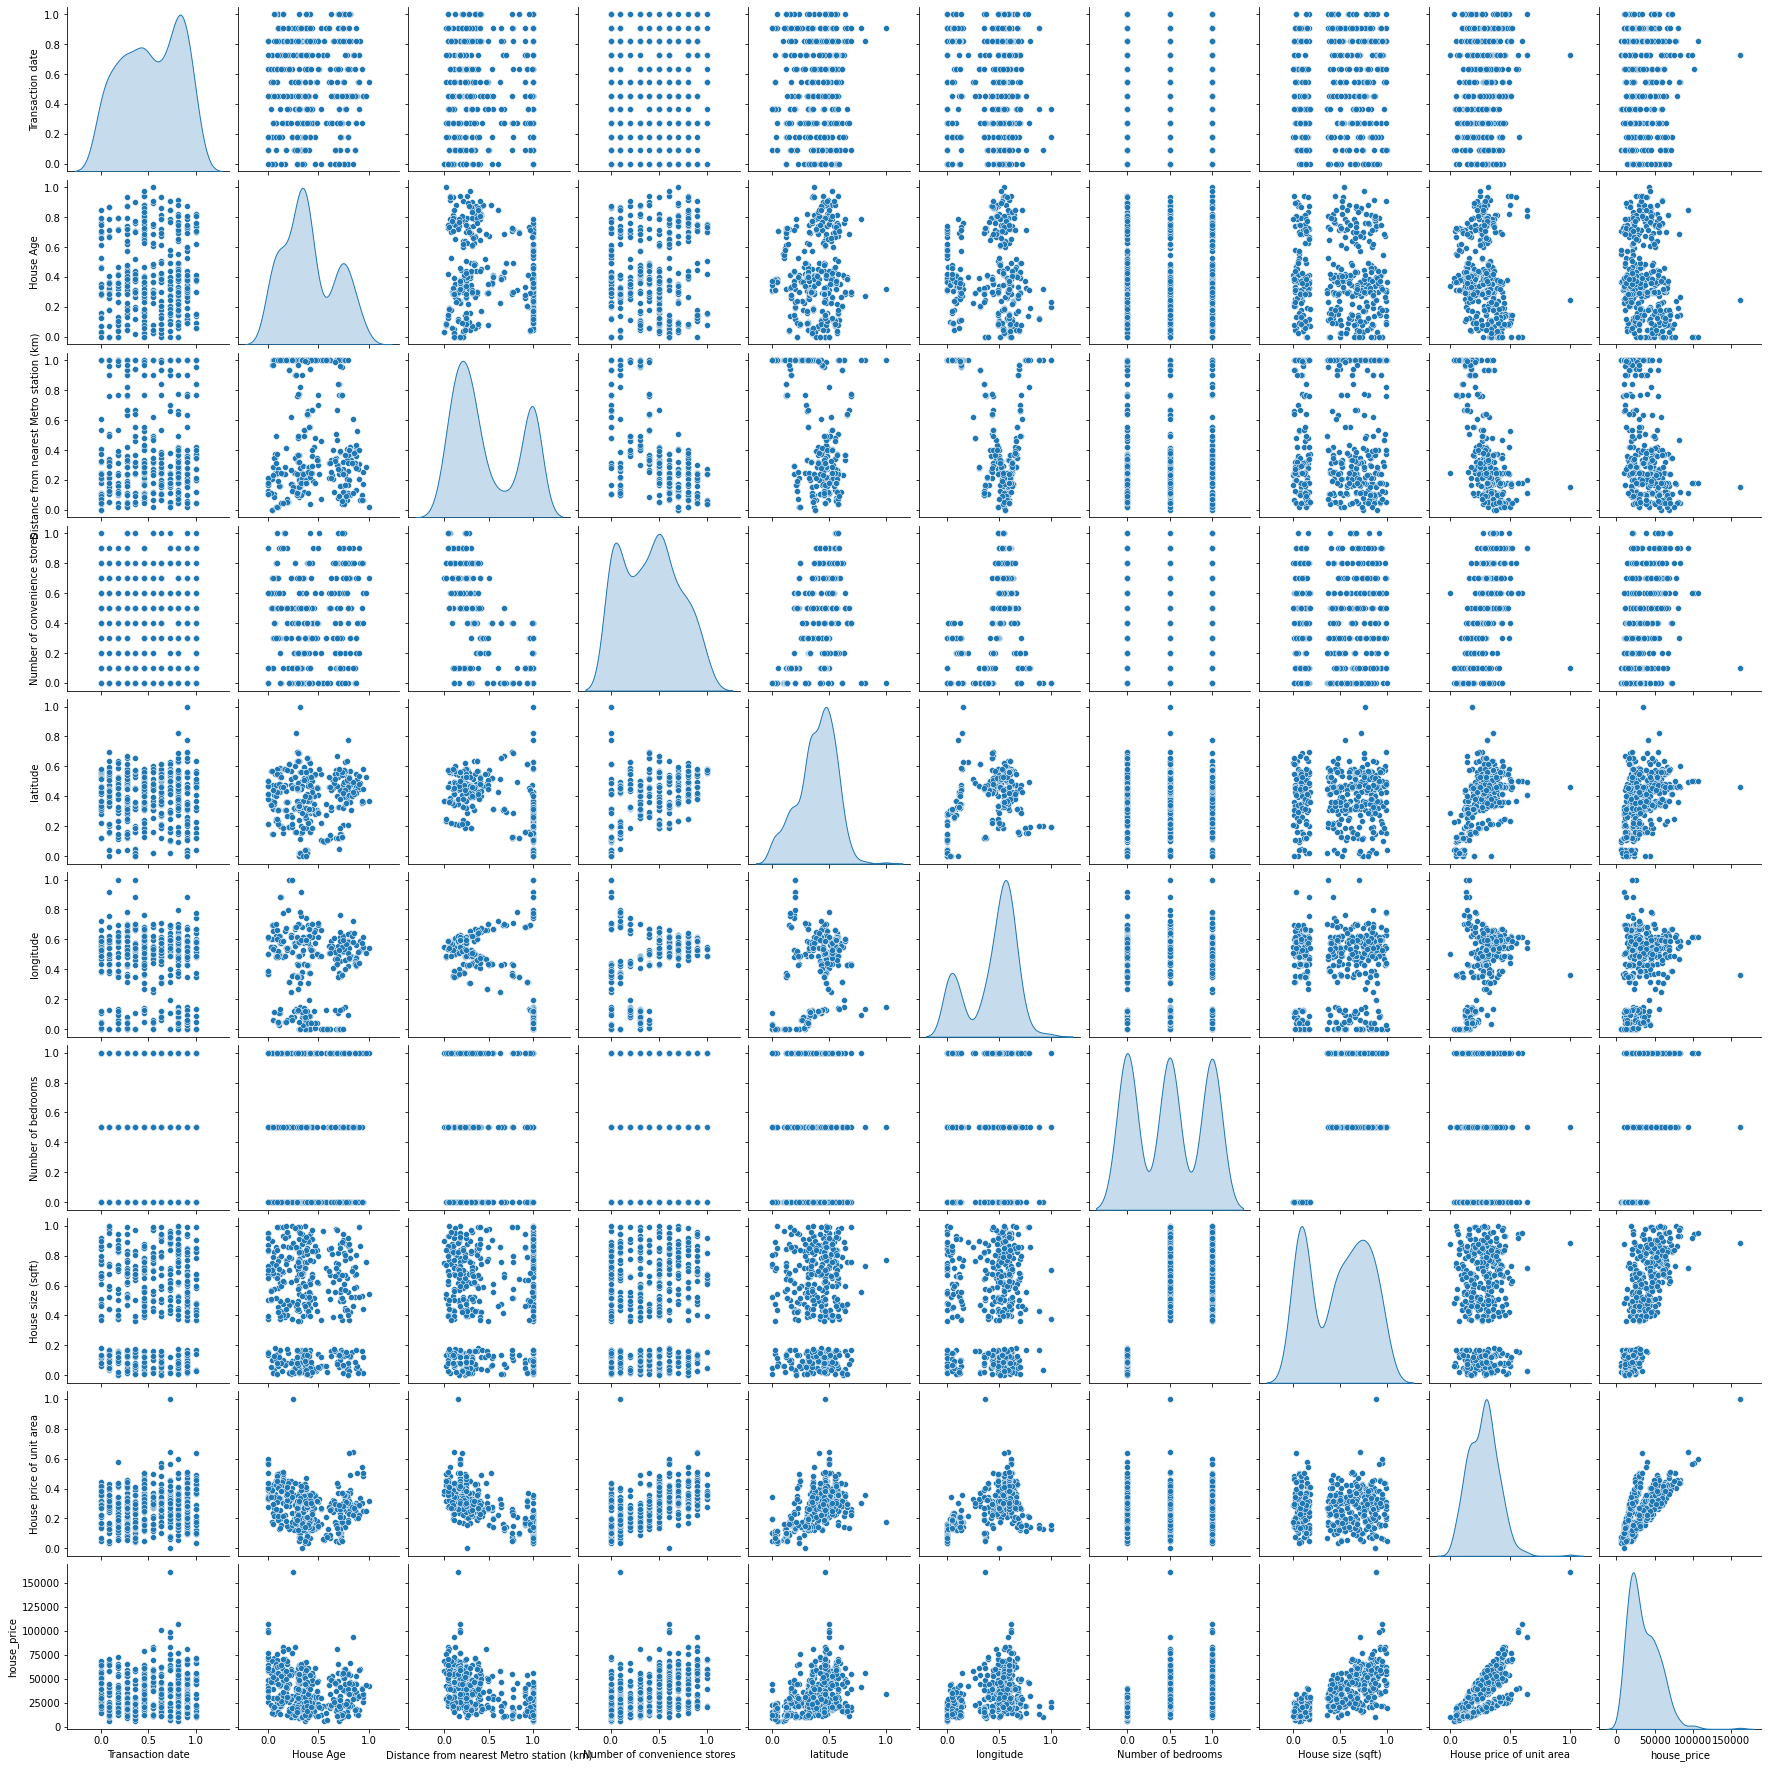

In [31]:
sns.pairplot(df5,diag_kind='kde')

array([[<AxesSubplot:title={'center':'Transaction date'}>,
        <AxesSubplot:title={'center':'House Age'}>,
        <AxesSubplot:title={'center':'Distance from nearest Metro station (km)'}>],
       [<AxesSubplot:title={'center':'Number of convenience stores'}>,
        <AxesSubplot:title={'center':'latitude'}>,
        <AxesSubplot:title={'center':'longitude'}>],
       [<AxesSubplot:title={'center':'Number of bedrooms'}>,
        <AxesSubplot:title={'center':'House size (sqft)'}>,
        <AxesSubplot:title={'center':'House price of unit area'}>],
       [<AxesSubplot:title={'center':'house_price'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

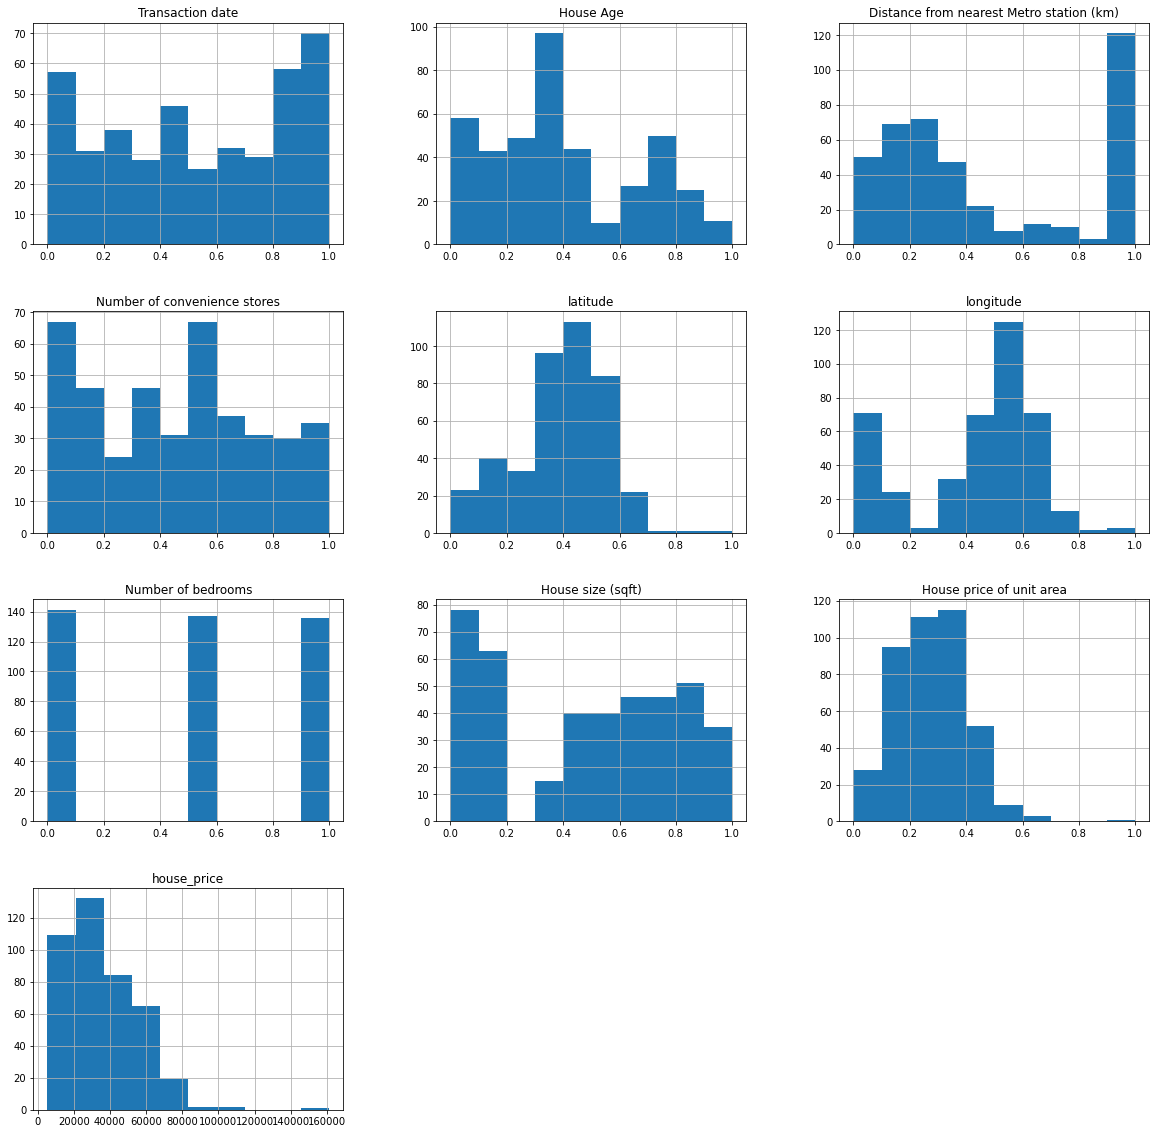

In [32]:
df5.hist(figsize=(20,20))

<AxesSubplot:>

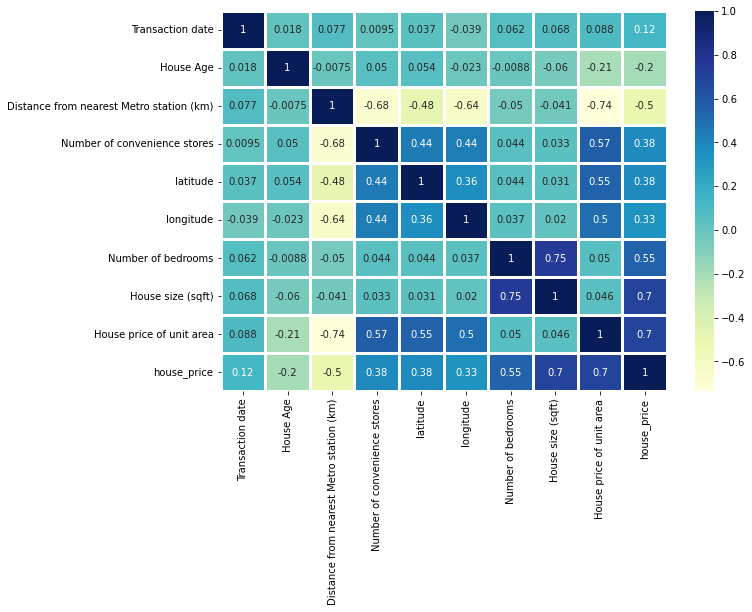

In [33]:
plt.figure(figsize=(10,7))
sns.heatmap(df5.corr(),annot=True,linewidths=3,cmap="YlGnBu")

# Model Preparation

In [34]:
df.columns

Index(['Transaction date', 'House Age',
       'Distance from nearest Metro station (km)',
       'Number of convenience stores', 'latitude', 'longitude',
       'Number of bedrooms', 'House size (sqft)', 'House price of unit area',
       'house_price'],
      dtype='object')

In [35]:
X = df5.drop(["house_price"],axis=1)
y = df5["house_price"]

In [36]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=45)

In [37]:
lm = LinearRegression() # Creating a Linear Regression object 'lm'
lm.fit(x_train,y_train)
predictions = lm.predict(x_test)
print("Mean absolute error (MAE):", metrics.mean_absolute_error(y_test,predictions))
print("Mean square error (MSE):", metrics.mean_squared_error(y_test,predictions))
print("Root mean square error (RMSE):", np.sqrt(metrics.mean_squared_error(y_test,predictions)))
print("R-squared value of predictions:",round(metrics.r2_score(y_test,predictions),3))

Mean absolute error (MAE): 3015.9717431132226
Mean square error (MSE): 25468555.25984767
Root mean square error (RMSE): 5046.638015535458
R-squared value of predictions: 0.945


In [38]:
SVM = SVR(kernel="linear")
SVM.fit(x_train,y_train)
predictions = SVM.predict(x_test)
print("Mean absolute error (MAE):", metrics.mean_absolute_error(y_test,predictions))
print("Mean square error (MSE):", metrics.mean_squared_error(y_test,predictions))
print("Root mean square error (RMSE):", np.sqrt(metrics.mean_squared_error(y_test,predictions)))
print("R-squared value of predictions:",round(metrics.r2_score(y_test,predictions),3))

Mean absolute error (MAE): 15819.399885165938
Mean square error (MSE): 471884970.1242185
Root mean square error (RMSE): 21722.913481488125
R-squared value of predictions: -0.023


In [39]:
Model1 = RandomForestRegressor(n_estimators=1000,random_state=0,n_jobs=1000,max_depth=70,bootstrap=True)
Model1.fit(x_train,y_train)
predictions = Model1.predict(x_test)
print("Mean absolute error (MAE):", metrics.mean_absolute_error(y_test,predictions))
print("Mean square error (MSE):", metrics.mean_squared_error(y_test,predictions))
print("Root mean square error (RMSE):", np.sqrt(metrics.mean_squared_error(y_test,predictions)))
print("R-squared value of predictions:",round(metrics.r2_score(y_test,predictions),3))

Mean absolute error (MAE): 1725.5758096000254
Mean square error (MSE): 40084910.01992657
Root mean square error (RMSE): 6331.264488230338
R-squared value of predictions: 0.913


In [40]:
Model2 = GradientBoostingRegressor()
Model2.fit(x_train,y_train)
predictions = Model2.predict(x_test)
print("Mean absolute error (MAE):", metrics.mean_absolute_error(y_test,predictions))
print("Mean square error (MSE):", metrics.mean_squared_error(y_test,predictions))
print("Root mean square error (RMSE):", np.sqrt(metrics.mean_squared_error(y_test,predictions)))
print("R-squared value of predictions:",round(metrics.r2_score(y_test,predictions),3))

Mean absolute error (MAE): 1705.4996990460916
Mean square error (MSE): 35365576.752384715
Root mean square error (RMSE): 5946.896396641253
R-squared value of predictions: 0.923


In [41]:
Model3 = DecisionTreeRegressor( max_depth=100,
 max_features=1.0, max_leaf_nodes=10,min_samples_leaf=1,
 min_samples_split=2, min_weight_fraction_leaf=0.10,
 random_state=27, splitter='best')
Model3.fit(x_train,y_train)
predictions = Model3.predict(x_test)
print("Mean absolute error (MAE):", metrics.mean_absolute_error(y_test,predictions))
print("Mean square error (MSE):", metrics.mean_squared_error(y_test,predictions))
print("Root mean square error (RMSE):", np.sqrt(metrics.mean_squared_error(y_test,predictions)))
print("R-squared value of predictions:",round(metrics.r2_score(y_test,predictions),3))

Mean absolute error (MAE): 6714.579420326135
Mean square error (MSE): 124781363.05931947
Root mean square error (RMSE): 11170.557866969737
R-squared value of predictions: 0.729


In [42]:
Model4 = AdaBoostRegressor()
Model4.fit(x_train,y_train)
y_pred = Model4.predict(x_test)
predictions = Model4.predict(x_test)
print("Mean absolute error (MAE):", metrics.mean_absolute_error(y_test,predictions))
print("Mean square error (MSE):", metrics.mean_squared_error(y_test,predictions))
print("Root mean square error (RMSE):", np.sqrt(metrics.mean_squared_error(y_test,predictions)))
print("R-squared value of predictions:",round(metrics.r2_score(y_test,predictions),3))

Mean absolute error (MAE): 3484.716546640095
Mean square error (MSE): 43123375.92346231
Root mean square error (RMSE): 6566.839112043351
R-squared value of predictions: 0.907


### From all the above regression model it seems that gradient boosting is the best as its MAE,MSE and RMSE values are very less than other models and has highest R-squared value.


## Model Optmization

In [43]:
from sklearn.model_selection import RandomizedSearchCV

In [44]:
## HYPER PARAMETER OPTMIZATION

n_estimators=[100,500,900,1100,1500]
max_depth= [2,3,5,10,15]
booster=['gbtree','gblinear']
learning_rate=[0.05,0.1,0.15,0.20]

hyperparameter_grid={
    'n_estimators':n_estimators,
    'max_depth':max_depth,
    'learning_rate':learning_rate
}



regressor=GradientBoostingRegressor()

random_cv= RandomizedSearchCV(estimator=regressor,
           param_distributions=hyperparameter_grid,
           cv=5,n_iter=5,
           scoring='neg_mean_absolute_error',n_jobs=4,
           verbose=5,
           return_train_score= True,
           random_state=42)

In [45]:
regressor.get_params().keys()

dict_keys(['alpha', 'ccp_alpha', 'criterion', 'init', 'learning_rate', 'loss', 'max_depth', 'max_features', 'max_leaf_nodes', 'min_impurity_decrease', 'min_samples_leaf', 'min_samples_split', 'min_weight_fraction_leaf', 'n_estimators', 'n_iter_no_change', 'random_state', 'subsample', 'tol', 'validation_fraction', 'verbose', 'warm_start'])

In [46]:
random_cv.fit(X,y)

Fitting 5 folds for each of 5 candidates, totalling 25 fits


RandomizedSearchCV(cv=5, estimator=GradientBoostingRegressor(), n_iter=5,
                   n_jobs=4,
                   param_distributions={'learning_rate': [0.05, 0.1, 0.15, 0.2],
                                        'max_depth': [2, 3, 5, 10, 15],
                                        'n_estimators': [100, 500, 900, 1100,
                                                         1500]},
                   random_state=42, return_train_score=True,
                   scoring='neg_mean_absolute_error', verbose=5)

In [47]:
random_cv.best_estimator_

GradientBoostingRegressor(learning_rate=0.2, n_estimators=1100)

In [48]:
random_cv.best_params_

{'n_estimators': 1100, 'max_depth': 3, 'learning_rate': 0.2}

In [49]:
Model2 = GradientBoostingRegressor(n_estimators= 1100, max_depth= 3, learning_rate= 0.2)
Model2.fit(x_train,y_train)
predictions = Model2.predict(x_test)
print("Mean absolute error (MAE):", metrics.mean_absolute_error(y_test,predictions))
print("Mean square error (MSE):", metrics.mean_squared_error(y_test,predictions))
print("Root mean square error (RMSE):", np.sqrt(metrics.mean_squared_error(y_test,predictions)))
print("R-squared value of predictions:",round(metrics.r2_score(y_test,predictions),3))

Mean absolute error (MAE): 1724.3392825864464
Mean square error (MSE): 31056723.157822546
Root mean square error (RMSE): 5572.855924732178
R-squared value of predictions: 0.933


## Feature Importance

Transaction date -> 0.00043878603255387895
House Age -> 0.0003524793304459365
Distance from nearest Metro station (km) -> 0.0006147111478596281
Number of convenience stores -> 0.00011999461216973128
latitude -> 0.0007034418247763854
longitude -> 0.0004569087454821497
Number of bedrooms -> 0.00466834944298922
House size (sqft) -> 0.5137328709430138
House price of unit area -> 0.4789124579207093


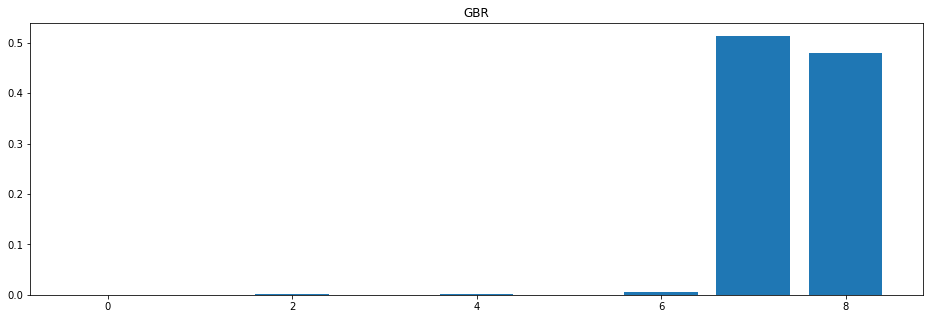

In [50]:
features =Model2.feature_importances_
Columns = list(X.columns)
for i,j in enumerate(features):
    print(Columns[i],"->",j)
plt.figure(figsize=(16,5))
plt.title(label="GBR")
plt.bar([x for x in range(len(features))],features)
plt.show()